In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 5)


In [8]:
import pandas as pd

df = pd.read_csv("all_states_districts_data.csv")
df.head()


,Date,State,District,Pincode,Age_0_5,Age_5_17,Age_18_greater,_state,_district
0,1/9/2025,Bihar,Araria,854318,30,19,0,Bihar,Araria
1,1/9/2025,Bihar,Araria,854329,21,2,0,Bihar,Araria
2,1/9/2025,Bihar,Araria,854333,17,3,0,Bihar,Araria
3,1/9/2025,Bihar,Araria,854334,5,10,0,Bihar,Araria
4,1/6/2025,Bihar,Araria,854328,25,50,10,Bihar,Araria


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125378 entries, 0 to 125377
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Date            125378 non-null  object
 1   State           125378 non-null  object
 2   District        125378 non-null  object
 3   Pincode         125378 non-null  int64 
 4   Age_0_5         125378 non-null  int64 
 5   Age_5_17        125378 non-null  int64 
 6   Age_18_greater  125378 non-null  int64 
 7   _state          125378 non-null  object
 8   _district       125378 non-null  object
dtypes: int64(4), object(5)
memory usage: 8.6+ MB


In [14]:
print(df.columns.tolist())


['Date', 'State', 'District', 'Pincode', 'Age_0_5', 'Age_5_17', 'Age_18_greater', '_state', '_district']


In [17]:
# Convert Age columns to numeric
Age_cols = ['Age_0_5', 'Age_5_17', 'Age_18_greater']
df[Age_cols] = df[Age_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing district/state
df = df.dropna(subset=['_state', '_district'])


In [11]:
wb_df = df[df['_state'].str.lower() == 'west bengal'].copy()
wb_df.head()


,Date,State,District,Pincode,Age_0_5,Age_5_17,Age_18_greater,_state,_district
69538,1/7/2025,West Bengal,Hooghly,712149,177,111,12,West Bengal,Hooghly
69539,2/9/2025,West Bengal,Hooghly,712122,1,0,0,West Bengal,Hooghly
69540,2/9/2025,West Bengal,Hooghly,712134,2,2,0,West Bengal,Hooghly
69541,2/9/2025,West Bengal,Hooghly,712221,1,2,0,West Bengal,Hooghly
69542,2/9/2025,West Bengal,Hooghly,712232,1,0,0,West Bengal,Hooghly


In [19]:
wb_df['total_enrolment'] = wb_df[Age_cols].sum(axis=1)



In [20]:
district_analysis_wb = (
    wb_df.groupby('_district')['total_enrolment']
    .sum()
    .reset_index()
)
district_analysis_wb.head()



,_district,total_enrolment
0,24 Paraganas North,6147
1,24 Paraganas South,490
2,Alipurduar,3857
3,Bankura,4011
4,Barddhaman,2859


In [21]:
top10_wb = (
    district_analysis_wb
    .sort_values(by='total_enrolment', ascending=False)
    .head(10)
)
top10_wb



,_district,total_enrolment
53,Uttar Dinajpur,19255
14,Dinajpur Uttar,11671
32,Malda,8055
36,Murshidabad,7645
49,South 24 Parganas,7240
0,24 Paraganas North,6147
47,Puruliya,6130
8,Cooch Behar,5880
10,Dakshin Dinajpur,5840
6,Birbhum,5805


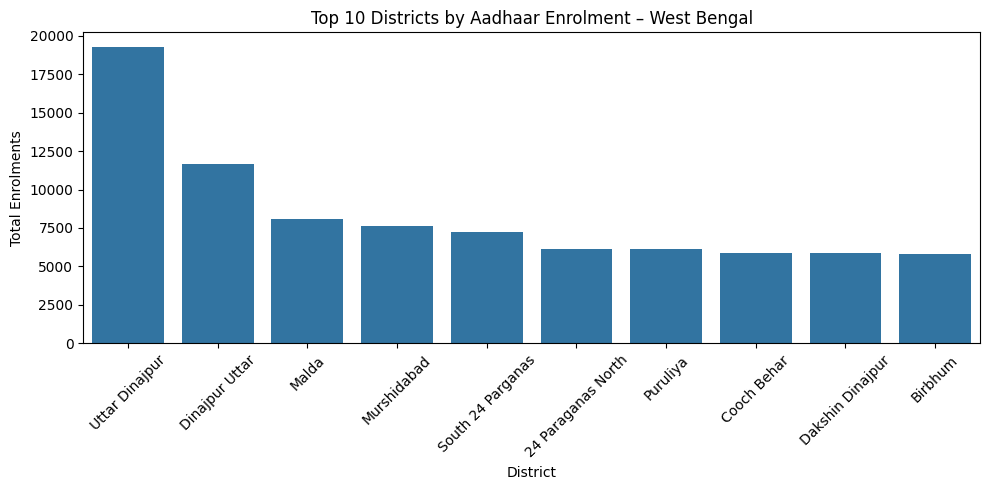

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x='_district', y='total_enrolment', data=top10_wb)
plt.xticks(rotation=45)
plt.title("Top 10 Districts by Aadhaar Enrolment – West Bengal")
plt.xlabel("District")
plt.ylabel("Total Enrolments")
plt.tight_layout()
plt.show()



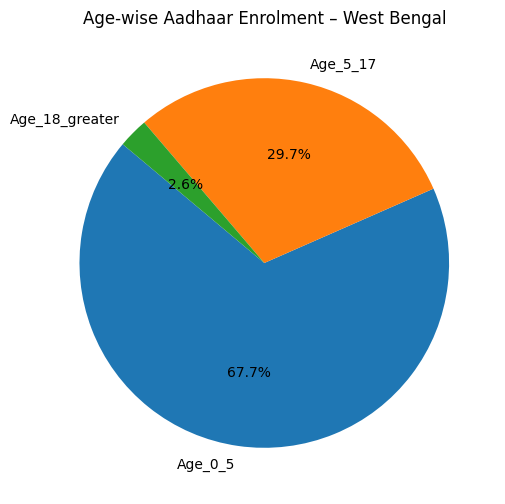

In [25]:
age_distribution_wb = wb_df[Age_cols].sum()

plt.figure(figsize=(6,6))
plt.pie(
    age_distribution_wb,
    labels=Age_cols,
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Age-wise Aadhaar Enrolment – West Bengal")
plt.show()


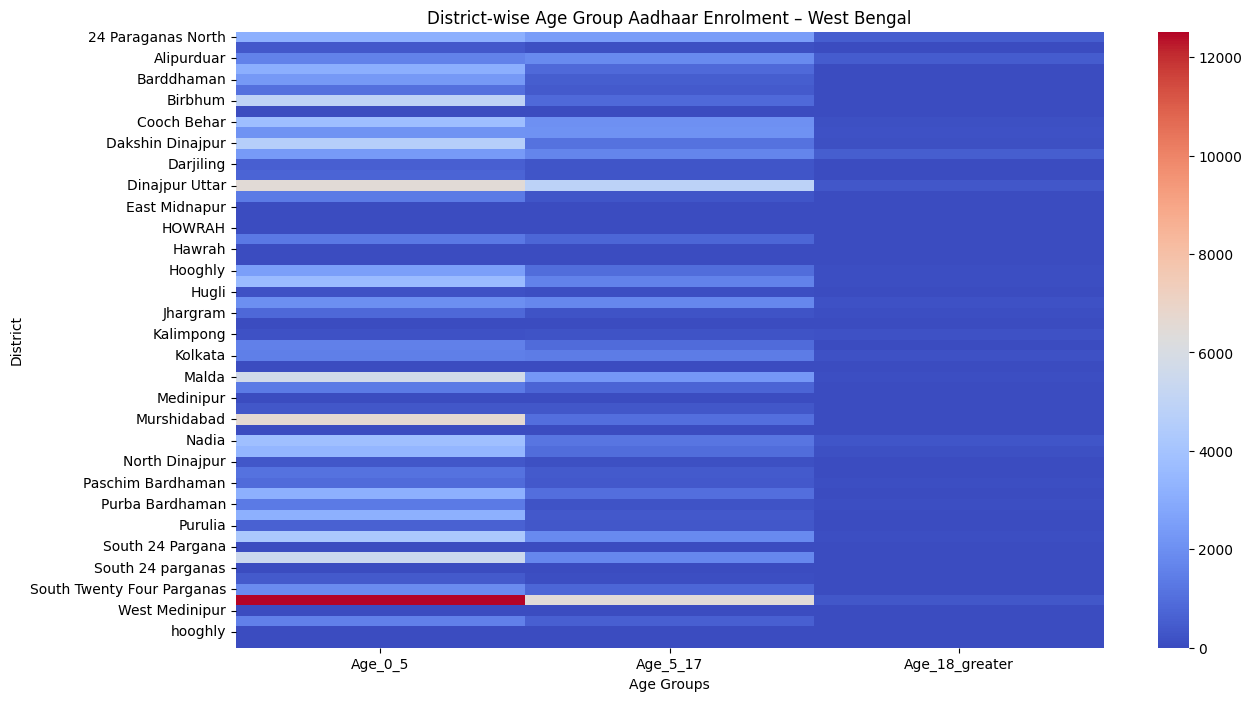

In [26]:
pivot_wb = wb_df.groupby('_district')[Age_cols].sum()

plt.figure(figsize=(14,8))
sns.heatmap(pivot_wb, cmap='coolwarm')
plt.title("District-wise Age Group Aadhaar Enrolment – West Bengal")
plt.xlabel("Age Groups")
plt.ylabel("District")
plt.show()


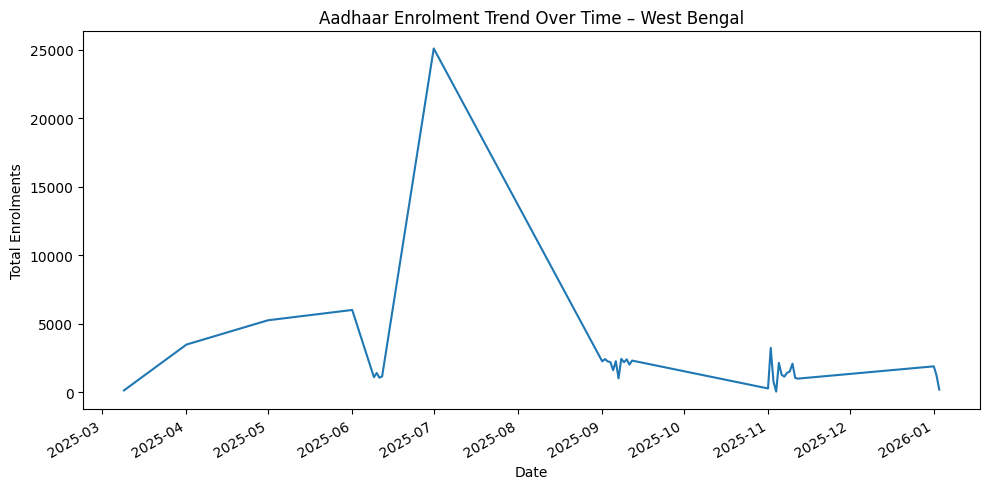

In [29]:
wb_df['Date'] = pd.to_datetime(
    wb_df['Date'],
    dayfirst=True,
    errors='coerce'
)

trend_wb = wb_df.groupby('Date')['total_enrolment'].sum()

plt.figure(figsize=(10,5))
trend_wb.plot()
plt.title("Aadhaar Enrolment Trend Over Time – West Bengal")
plt.xlabel("Date")
plt.ylabel("Total Enrolments")
plt.tight_layout()
plt.show()


In [30]:
wb_df.to_csv("west_bengal_cleaned.csv", index=False)
